## Read, run and understand the code given below ##
## We'll discuss it in class once you have understood it. ##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import os


In [3]:
path = 'Data/main/caltech-101/101_ObjectCategories'
classes = os.listdir(path)
classes

newlist = []
for item in classes:
    try:
        os.listdir(path+'/'+item)
        newlist.append(item)
    except:
        continue
classes = newlist
classes

['gerenuk',
 'hawksbill',
 'headphone',
 'ant',
 'butterfly',
 'lamp',
 'strawberry',
 'water_lilly',
 'chandelier',
 'dragonfly',
 'crab',
 'pagoda',
 'dollar_bill',
 'emu',
 'inline_skate',
 'platypus',
 'dalmatian',
 'cup',
 'airplanes',
 'joshua_tree',
 'cougar_body',
 'grand_piano',
 'trilobite',
 'brontosaurus',
 'wild_cat',
 'pigeon',
 'dolphin',
 'soccer_ball',
 'wrench',
 'scorpion',
 'flamingo_head',
 'nautilus',
 'accordion',
 'cougar_face',
 'pyramid',
 'camera',
 'barrel',
 'schooner',
 'cellphone',
 'panda',
 'revolver',
 'lobster',
 'menorah',
 'lotus',
 'stapler',
 'crocodile',
 'chair',
 'helicopter',
 'minaret',
 'starfish',
 'ceiling_fan',
 'ketch',
 'mayfly',
 'wheelchair',
 'bass',
 'yin_yang',
 'crocodile_head',
 'saxophone',
 'beaver',
 'mandolin',
 'bonsai',
 'Leopards',
 'car_side',
 'ibis',
 'electric_guitar',
 'kangaroo',
 'stegosaurus',
 'ferry',
 'snoopy',
 'umbrella',
 'rhino',
 'okapi',
 'watch',
 'brain',
 'gramophone',
 'scissors',
 'rooster',
 'cannon'

In [4]:
ourclassnums = np.random.choice(len(classes), 10)


In [5]:
def grid(image, gridsize=50, stride = 10):
    rects = []
    rows = image.shape[0]
    cols = image.shape[1]
    for i in range(0,rows-gridsize,stride):
        for j in range(0,cols-gridsize,stride):
            r1 = i
            c1 = j
            r2 = i+gridsize
            c2 = j+gridsize
            rects.append([r1,c1,r2,c2])
    return np.array(rects)

def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


In [6]:
features = []
filenames = []
boxnums = []

# For HOG
o = 8
ppc = (16,16)
cpb = (1,1)

# Read HOG from all samples
for classnum in ourclassnums:
    folder = path + '/' + classes[classnum]
    print(classes[classnum], end='')
    filelist = os.listdir(folder)
    #np.random.shuffle(filelist)
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        print('.',end='')
        if filelist[i].upper()=='THUMBS.DB':
            continue
        image = io.imread(filename)
        image = imNormalize(image)
        
        boxes = grid(image,128,64)
        for b in range(boxes.shape[0]):
            r1 = boxes[b,0]
            c1 = boxes[b,1]
            r2 = boxes[b,2]
            c2 = boxes[b,3]
            patch = image[r1:r2,c1:c2]
            fd = feature.hog(patch, orientations=o, pixels_per_cell=ppc, cells_per_block=cpb, 
                             visualize=False, channel_axis=2)
            filenames.append(filename)
            features.append(fd)
            boxnums.append(boxes[b,:])
    print()
        
features = np.array(features)
boxnums = np.array(boxnums)
features.shape

garfield..................................
inline_skate...............................
Faces...................................................................................................................................................................................................................................................................................................................................................................................................................................................
electric_guitar...........................................................................
revolver..................................................................................
emu.....................................................
saxophone........................................
crab.........................................................................
car_side.................................................................................................

(13749, 512)

In [7]:
from sklearn.cluster import KMeans

no_of_clusters = 500
model1 = KMeans(no_of_clusters)
model1.fit(features)


KMeans(n_clusters=500)

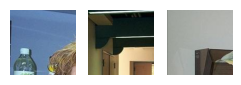

In [8]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 10

for row in range(len(filenames)):
    if model1.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        image = io.imread(filenames[row])
        image = imNormalize(image)
        
        box = boxnums[row,:]
        r1 = box[0]
        c1 = box[1]
        r2 = box[2]
        c2 = box[3]
        patch = image[r1:r2,c1:c2]
        
        fig.add_subplot(rows, columns, count)
        plt.imshow(patch)
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()